In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option('display.max_rows',None)


In [5]:
train_data=pd.read_csv('fashion-mnist_train.csv')
test_data=pd.read_csv('fashion-mnist_test.csv')

In [6]:
print(f"Shape Of Train Data :{train_data.shape}")
print(f"Shape Of Test Data :{test_data.shape}")

Shape Of Train Data :(60000, 785)
Shape Of Test Data :(10000, 785)


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [9]:
print(f"maximum value : {np.max(train_data)}\n minimum value : {np.min(train_data)}")

maximum value : 255
 minimum value : 0


In [10]:

train_images = train_data.iloc[:, 1:].values
train_labels = train_data.iloc[:, 0].values

test_images = test_data.iloc[:, 1:].values
test_labels = test_data.iloc[:, 0].values

In [11]:
train_images.shape

(60000, 784)

In [12]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]


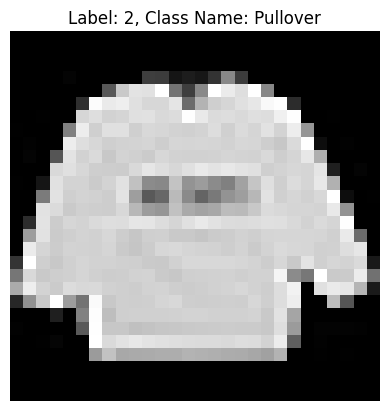

In [13]:

image = train_images[0].reshape(28, 28)

plt.imshow(image, cmap='gray')
plt.title(f"Label: {train_labels[0]}, Class Name: {class_names[train_labels[0]]}")
plt.axis("off")
plt.show()

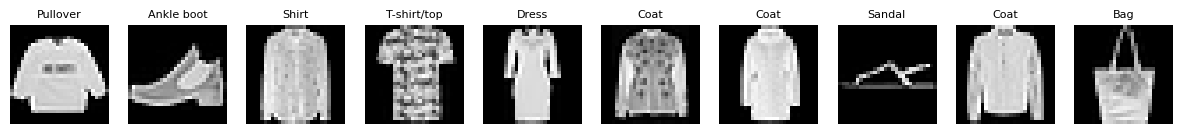

In [14]:

num_images = 10

fig, axes = plt.subplots(1, num_images, figsize=(15, 15))

for i in range(num_images):
    image = train_images[i].reshape(28, 28)
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"{class_names[train_labels[i]]}", fontsize=8)
    axes[i].axis('off')
plt.show()

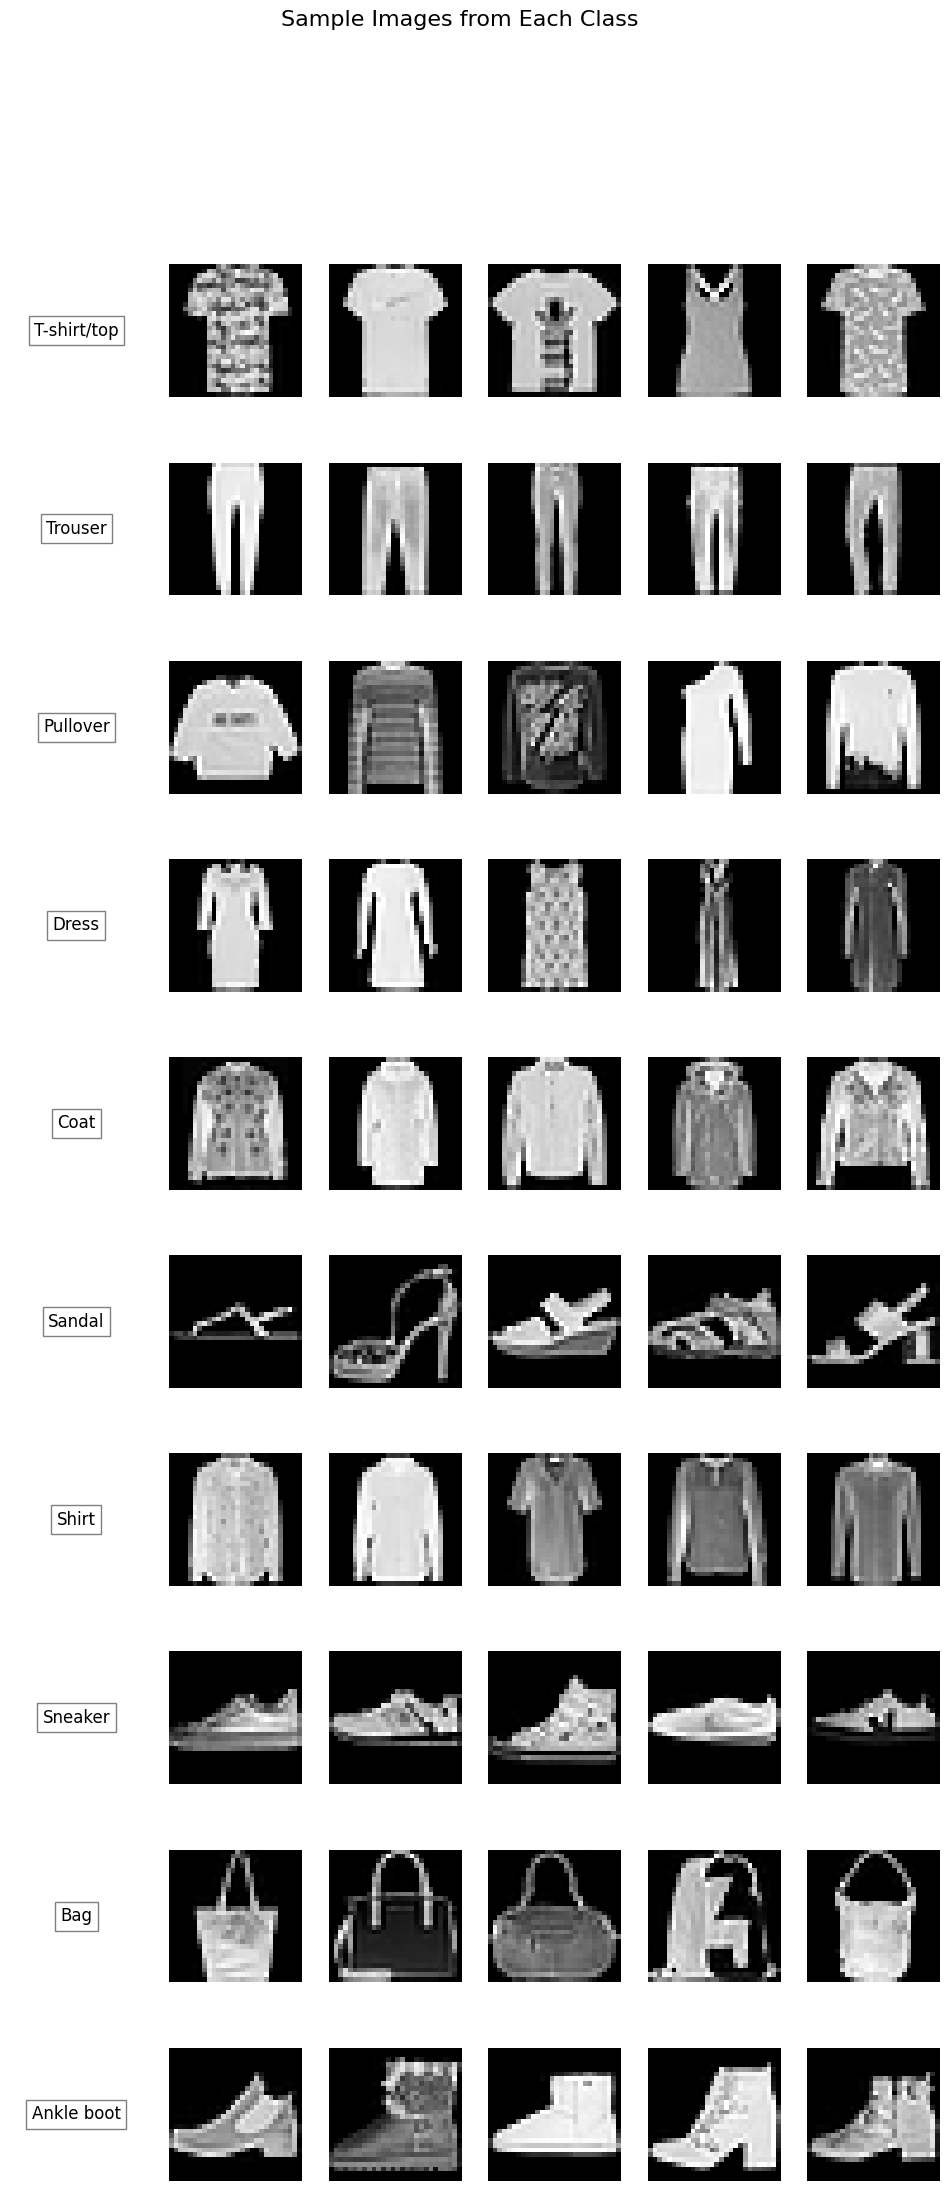

In [15]:

num_classes = len(class_names)
images_per_class = 5

fig, axes = plt.subplots(num_classes, images_per_class + 1, figsize=(12, num_classes * 2.5))

for i, class_name in enumerate(class_names):
    axes[i, 0].text(0.5, 0.5, class_name, ha='center', va='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
    axes[i, 0].axis('off')
    class_indices = [index for index, label in enumerate(train_labels) if label == i]

    for j in range(images_per_class):
        image = train_images[class_indices[j]].reshape(28, 28)
        axes[i, j + 1].imshow(image, cmap='gray')
        axes[i, j + 1].axis('off')

plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.suptitle('Sample Images from Each Class', fontsize=16)
plt.show()




In [16]:
train_labels_named = [class_names[label] for label in train_labels]
class_counts = pd.Series(train_labels_named).value_counts()
class_counts_df = class_counts.reset_index()
class_counts_df.columns = ['Class', 'Count']
class_counts_df

,Class,Count
0,Pullover,6000
1,Ankle boot,6000
2,Shirt,6000
3,T-shirt/top,6000
4,Dress,6000
5,Coat,6000
6,Sandal,6000
7,Bag,6000
8,Sneaker,6000
9,Trouser,6000


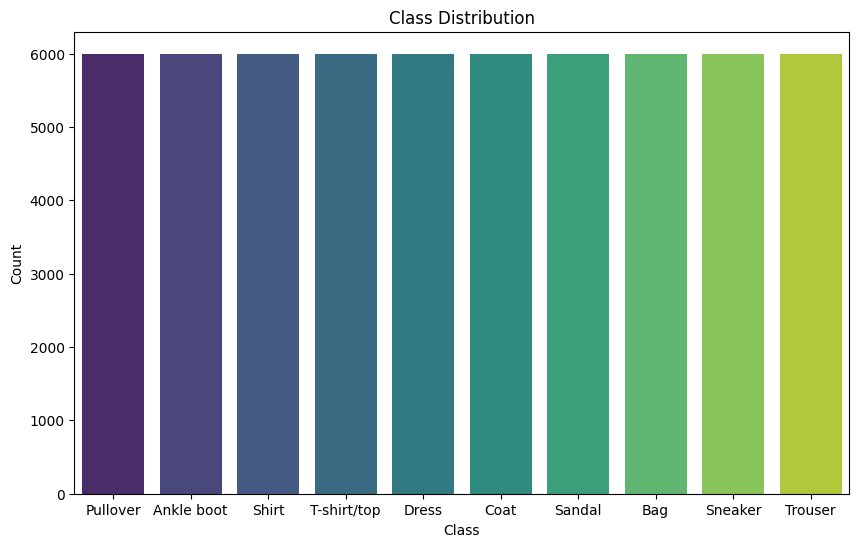

In [17]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Count', data=class_counts_df, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)


In [19]:
x_test = test_images
y_test = test_labels

In [20]:

model1 = models.Sequential([
    layers.Rescaling(1./255, input_shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model1.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [23]:

history = model1.fit(x_train, y_train,
                    validation_data=(x_valid, y_valid),
                    epochs=30,
                    batch_size=32,
                    callbacks=[early_stopping])

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7462 - loss: 0.7289 - val_accuracy: 0.8498 - val_loss: 0.4200
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8530 - loss: 0.4115 - val_accuracy: 0.8633 - val_loss: 0.3840
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8706 - loss: 0.3563 - val_accuracy: 0.8618 - val_loss: 0.3717
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8795 - loss: 0.3332 - val_accuracy: 0.8712 - val_loss: 0.3547
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8878 - loss: 0.3074 - val_accuracy: 0.8851 - val_loss: 0.3164
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.8940 - loss: 0.2881 - val_accuracy: 0.8749 - val_loss: 0.3465
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8972 - loss: 0.2797 - val_accuracy: 0.8781 - val_loss: 0.3332
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9031 - loss: 0.26

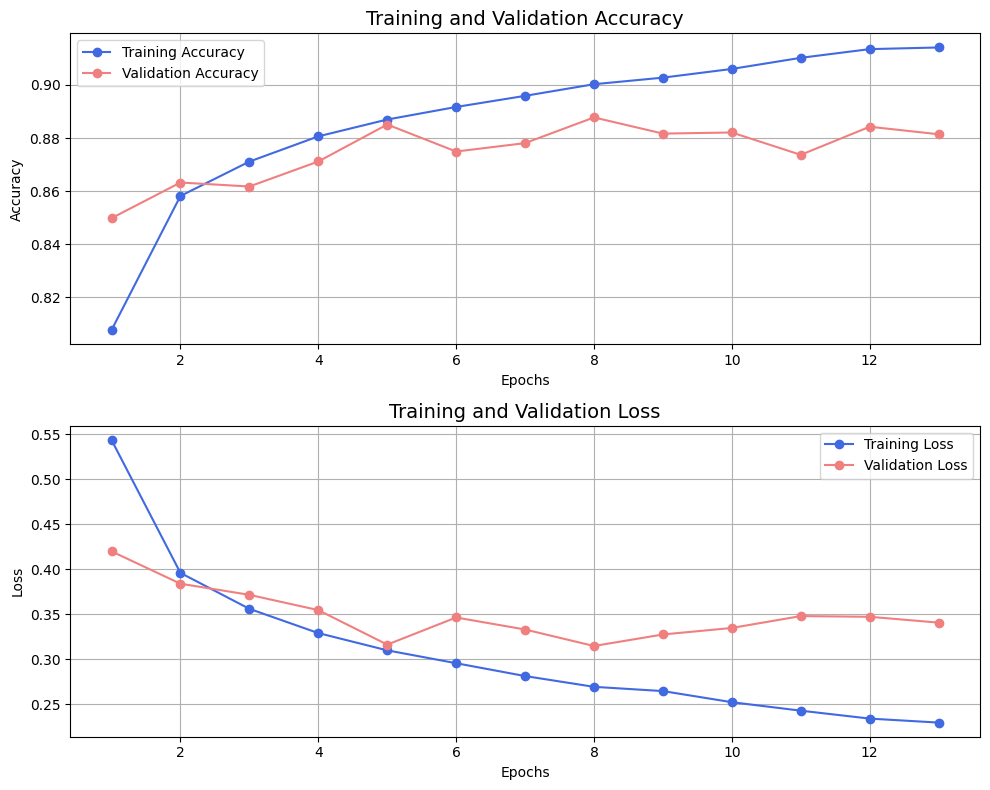

In [24]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    fig, ax = plt.subplots(2, 1, figsize=(10, 8))

    epochs = range(1, len(acc) + 1)


    ax[0].plot(epochs, acc, color='royalblue', linestyle='-', marker='o', label='Training Accuracy')
    ax[0].plot(epochs, val_acc, color='lightcoral', linestyle='-', marker='o', label='Validation Accuracy')
    ax[0].set_title('Training and Validation Accuracy', fontsize=14)
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend(loc='best')
    ax[0].grid(True)

    ax[1].plot(epochs, loss, color='royalblue', linestyle='-', marker='o', label='Training Loss')
    ax[1].plot(epochs, val_loss, color='lightcoral', linestyle='-', marker='o', label='Validation Loss')
    ax[1].set_title('Training and Validation Loss', fontsize=14)
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].legend(loc='best')
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()


plot_history(history)

In [25]:

predictions = model1.predict(x_test)
predicted_classes = predictions.argmax(axis=1)
df_predictions = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': predicted_classes
})

df_predictions.head(10)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,True Label,Predicted Label
0,0,0
1,1,1
2,2,2
3,2,2
4,3,4
5,2,6
6,8,8
7,6,4
8,5,5
9,0,0


In [26]:

x_train_reshaped = x_train.reshape(-1, 28, 28, 1)
x_valid_reshaped = x_valid.reshape(-1, 28, 28, 1)
x_test_reshaped = x_test.reshape(-1, 28, 28, 1)


In [27]:

model2 = models.Sequential([
    layers.Rescaling(1./255, input_shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model2.fit(x_train_reshaped, y_train,
                    validation_data=(x_valid_reshaped, y_valid),
                    epochs=50,
                    batch_size=64,
                    callbacks=[early_stopping])

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 54s 69ms/step - accuracy: 0.6459 - loss: 0.9782 - val_accuracy: 0.8317 - val_loss: 0.4433
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 71ms/step - accuracy: 0.8140 - loss: 0.5033 - val_accuracy: 0.8681 - val_loss: 0.3578
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 71ms/step - accuracy: 0.8406 - loss: 0.4430 - val_accuracy: 0.8769 - val_loss: 0.3328
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 52s 69ms/step - accuracy: 0.8508 - loss: 0.4026 - val_accuracy: 0.8882 - val_loss: 0.3076
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 69ms/step - accuracy: 0.8685 - loss: 0.3654 - val_accuracy: 0.8898 - val_loss: 0.2939
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 53s 70ms/step - accuracy: 0.8716 - loss: 0.3499 - val_accuracy: 0.8980 - val_loss: 0.2782
Epoch 7/50


In [ ]:


plot_history(history)


In [ ]:

predictions = model2.predict(x_test_reshaped)
predicted_classes = predictions.argmax(axis=1)

results_df = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': predicted_classes
})


results_df.head()


In [ ]:
test_loss, test_accuracy = model2.evaluate(x_test_reshaped, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, predicted_classes, target_names=class_names)
print(report)


In [ ]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {test_labels[i]}, Pred: {predicted_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()